<a href="https://colab.research.google.com/github/gbonarjr/MIT725/blob/main/Copy_of_MIT72_Data_Warehouse_%26_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
# Load the data
url = "https://www.worldometers.info/population/countries-in-africa-by-population/"

In [ ]:
# pd.read_html() or pd.read_csv())
data = {
    'Country': ['Nigeria', 'Ethiopia', 'Egypt', 'DR Congo', 'Tanzania'],
    'Population': [237527782, 135472051, 118365995, 112832473, 70545865],
    'Yearly Change': [2.08, 2.58, 1.57, 3.25, 2.9],
    'Net Change': [484804, 3412284, 1827737, 3556208, 1985708],
    'Density (P/Km²)': [261, 135, 119, 50, 80],
    'Land Area (Km²)': [910770, 1000000, 995450, 2267050, 1213090],
    'Migrants (net)': [-60000, 30000, -38033, 23861, 145405],
    'Fert. Rate': [5.4, 4.3, 3.3, 6.0, 2.4],
    'Med. Age': [18, 19, 25, 17, 28],
    'Urban Pop %': [52, 21, 43, 45, 67],
    'World Share': [2.64, 1.47, 1.31, 1.15, 0.76]
}


In [ ]:
df = pd.DataFrame(data)


In [ ]:
# Convert percentage strings to numeric values
df['Urban Pop %'] = df['Urban Pop %'].astype(float) / 100


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Country            0
Population         0
Yearly Change      0
Net Change         0
Density (P/Km²)    0
Land Area (Km²)    0
Migrants (net)     0
Fert. Rate         0
Med. Age           0
Urban Pop %        0
World Share        0
dtype: int64


In [ ]:
# Descriptive statistics
print("\nDescriptive statistics:\n", df.describe())



Descriptive statistics:
          Population  Yearly Change    Net Change  Density (P/Km²)  \
count  5.000000e+00       5.000000  5.000000e+00         5.000000   
mean   1.144615e+08       2.312000  2.695234e+06       106.600000   
std    5.525857e+07       0.726753  1.622792e+06        74.318907   
min    5.930869e+07       1.280000  7.504200e+05        40.000000   
25%    8.956140e+07       1.940000  1.946331e+06        49.000000   
50%    1.023344e+08       2.570000  2.718572e+06       103.000000   
75%    1.149636e+08       2.580000  2.884858e+06       115.000000   
max    2.061396e+08       3.190000  5.175990e+06       226.000000   

       Land Area (Km²)  Migrants (net)  Fert. Rate   Med. Age  Urban Pop %  \
count     5.000000e+00         5.00000    5.000000   5.000000     5.000000   
mean      1.277272e+06     20246.60000    4.280000  21.400000     0.456000   
std       5.644482e+05     80013.82127    1.475466   4.827007     0.166673   
min       9.107700e+05    -60000.00000  

In [ ]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()
print("\nCorrelation matrix:\n", corr_matrix)



Correlation matrix:
                  Population  Yearly Change  Net Change  Density (P/Km²)  \
Population         1.000000       0.400069    0.957056         0.963619   
Yearly Change      0.400069       1.000000    0.640151         0.168825   
Net Change         0.957056       0.640151    1.000000         0.851874   
Density (P/Km²)    0.963619       0.168825    0.851874         1.000000   
Land Area (Km²)   -0.412203       0.530418   -0.164523        -0.639448   
Migrants (net)    -0.771129      -0.530091   -0.764181        -0.703752   
Fert. Rate         0.537926       0.960599    0.753073         0.299029   
Med. Age          -0.572684      -0.965211   -0.782697        -0.366702   
Urban Pop %       -0.151847      -0.542308   -0.263182        -0.126302   
World Share        0.999996       0.401179    0.957451         0.963035   

                 Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  \
Population             -0.412203       -0.771129    0.537926 -0.572684   
Year

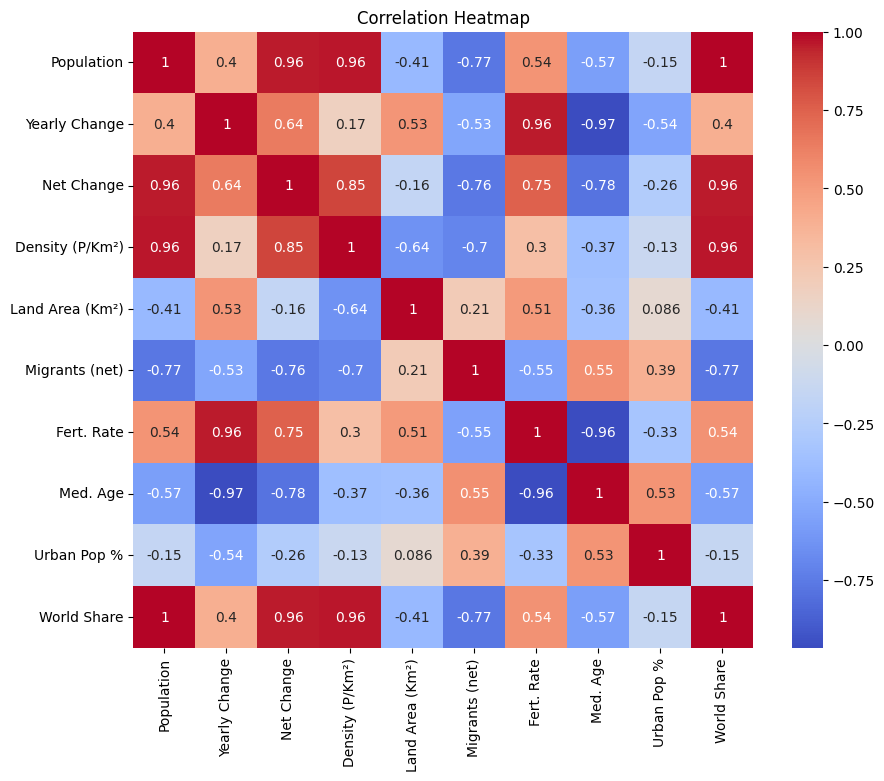

In [ ]:
# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Simple Linear Regression: Population vs Net Change
X = df[['Population']]
y = df['Net Change']

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
# Metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"\nSimple Linear Regression (Population vs Net Change):")
print(f"R-squared: {r2:.3f}")
print(f"MSE: {mse:.2f}")


Simple Linear Regression (Population vs Net Change):
R-squared: 0.916
MSE: 177058335400.66


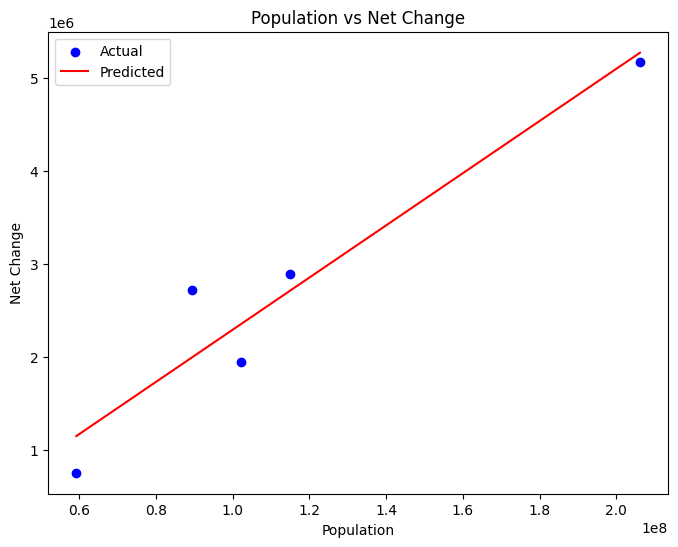

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.title('Population vs Net Change')
plt.xlabel('Population')
plt.ylabel('Net Change')
plt.legend()
plt.show()

In [ ]:
# Multiple Linear Regression
# Select relevant features (excluding country and derived metrics)
X_multi = df[['Population', 'Yearly Change', 'Density (P/Km²)', 'Land Area (Km²)',
              'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %']]
y_multi = df['Net Change']

In [ ]:
multi_model = LinearRegression()
multi_model.fit(X_multi, y_multi)
y_multi_pred = multi_model.predict(X_multi)


In [ ]:
# Metrics
r2_multi = r2_score(y_multi, y_multi_pred)
mse_multi = mean_squared_error(y_multi, y_multi_pred)
print(f"\nMultiple Linear Regression:")
print(f"R-squared: {r2_multi:.3f}")
print(f"MSE: {mse_multi:.2f}")


Multiple Linear Regression:
R-squared: 1.000
MSE: 0.00


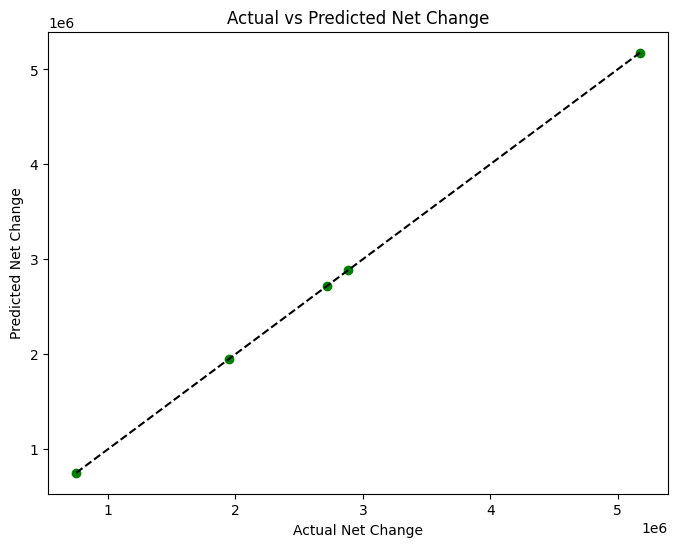

In [ ]:
# Visualization - Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_multi, y_multi_pred, color='green')
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'k--')
plt.title('Actual vs Predicted Net Change')
plt.xlabel('Actual Net Change')
plt.ylabel('Predicted Net Change')
plt.show()

In [ ]:
# Polynomial Regression: Med. Age vs Fert. Rate
X_poly = df[['Med. Age']]
y_poly = df['Fert. Rate']


In [ ]:
# Degree 2 polynomial
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X_poly, y_poly)
y_poly_pred = poly_model.predict(X_poly)


In [ ]:
# Metrics
r2_poly = r2_score(y_poly, y_poly_pred)
mse_poly = mean_squared_error(y_poly, y_poly_pred)
print(f"\nPolynomial Regression (Med. Age vs Fert. Rate):")
print(f"R-squared: {r2_poly:.3f}")
print(f"MSE: {mse_poly:.2f}")



Polynomial Regression (Med. Age vs Fert. Rate):
R-squared: 0.944
MSE: 0.10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


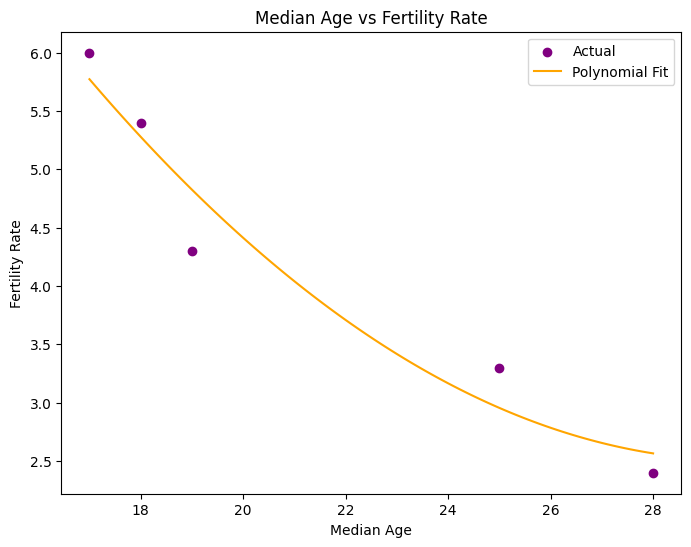

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_poly, y_poly, color='purple', label='Actual')
x_plot = np.linspace(X_poly.min(), X_poly.max(), 100).reshape(-1, 1)
y_plot = poly_model.predict(x_plot)
plt.plot(x_plot, y_plot, color='orange', label='Polynomial Fit')
plt.title('Median Age vs Fertility Rate')
plt.xlabel('Median Age')
plt.ylabel('Fertility Rate')
plt.legend()
plt.show()